In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
df = pd.read_csv('../dataset/advertising.csv')
df.head(5)

X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
""""
So we have TV,	Radio,	Newspaper,	Sales column 
So Idealy our eqaution should or will look like this 

Sales =  B0+B1*TV+B2 *Radio+B3*Newspaper

"""

'"\nSo we have TV,\tRadio,\tNewspaper,\tSales column \nSo Idealy our eqaution should or will look like this \n\nSales =  B0+B1*TV+B2 *Radio+B3*Newspaper\n\n'

In [80]:
class MLR():
    def __init__(self):
        self.weights = None
    
    def fit(self,x_train,y_train):
        feature_matrix = np.c_[np.ones((1,x_train.shape[0])).T,x_train]

        # weights = (XᵀX)⁻¹ Xᵀy
        self.weights = np.linalg.inv(feature_matrix.T.dot(feature_matrix)).dot(feature_matrix.T).dot(y_train)

    def predict(self,x_test):
        feature_matrix = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        return feature_matrix.dot(self.weights)

In [81]:
model = MLR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [82]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Weights (including bias):", model.weights)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Weights (including bias): [4.71412640e+00 5.45092708e-02 1.00945362e-01 4.33664682e-03]
R² Score: 0.9059
RMSE: 1.7052
MAE: 1.2748


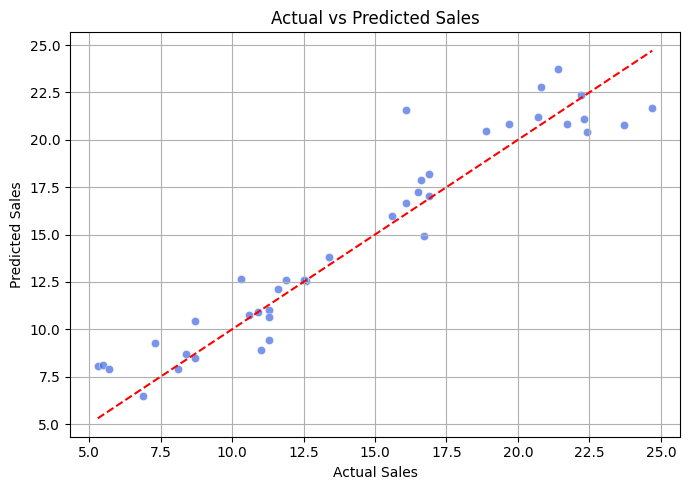

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()